## Introdução a Machine Learning

### Importação das bibliotecas

In [1]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

### Importando o Dataset


In [2]:
uri = "https://raw.githubusercontent.com/luizhmoraes/Intro-to-machine-learning-alura/main/Dados/car-prices.csv"csv"
df = pd.read_csv(uri)
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
colunas = {
    'unfinished': "nao_finalizado",
    'expected_hours': "horas_esperadas",
    'price': "preco"
}

df = df.rename(columns=colunas)
df.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca = {
    0:1,
    1:0
}

df['finalizado'] = df['nao_finalizado'].map(troca)
df.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

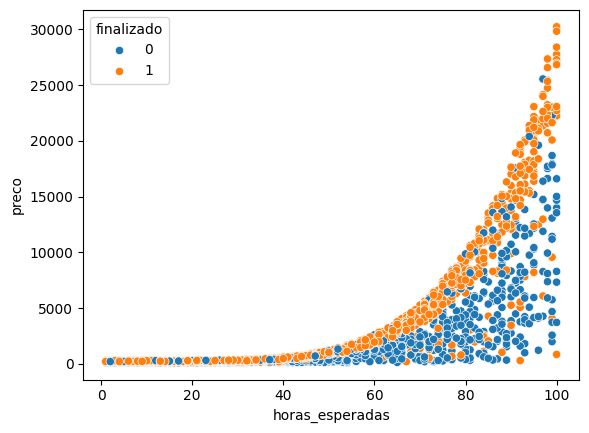

In [5]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=df)

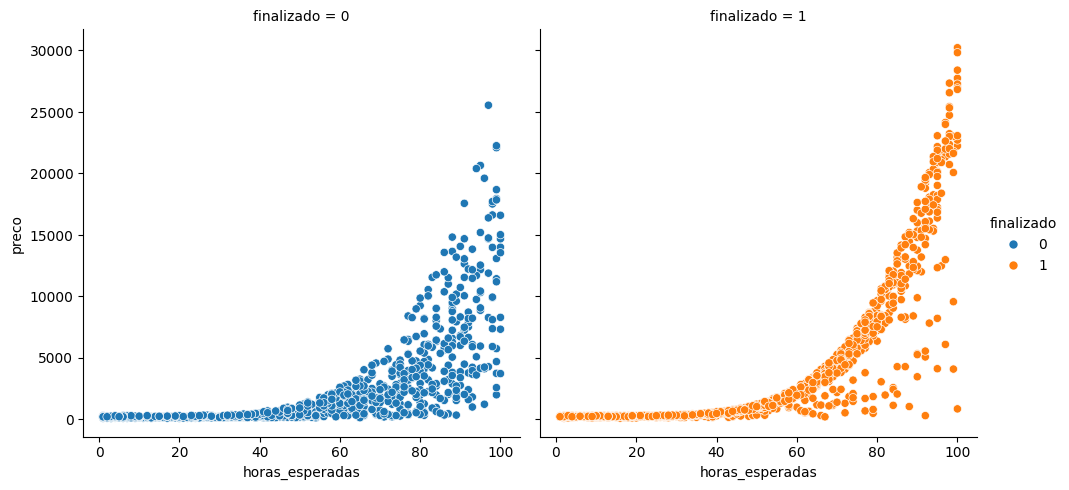

In [6]:
sns.relplot(x='horas_esperadas', y='preco', col='finalizado', hue='finalizado', data=df)

## Criando modelo de predição:

In [7]:
x = df[['horas_esperadas','preco']]
y = df['finalizado']

In [8]:
SEED = 20

train_x, test_x, train_y, teste_y = train_test_split(x, y, 
                                                     random_state=SEED,
                                                     test_size=0.25,
                                                     stratify = y
                                                    )
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(train_x), (len(test_x))))

model = LinearSVC(dual='auto')
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

acuracia = accuracy_score(previsoes, teste_y)
print(f'Taxa de acerto: {acuracia:.2%}')

Treinaremos com 1617 elementos e testaremos com 540 elementos
Taxa de acerto: 54.44%


### Baseline

In [9]:
import numpy as np
previsos_de_base = np.ones(len(test_x))
acuracia = accuracy_score(teste_y, previsos_de_base)
print(f'Taxa de acerto do algoritmo de baseline foi de: {acuracia:.2%}')

Taxa de acerto do algoritmo de baseline foi de: 52.59%


Do conjunto teste_x, coletaremos o valor mínimo (min()) para horas_esperadas, e atribuiremos o nome x_min a esse valor. Faremos um procedimento similar para x_max, mas dessa vez coletando o valor máximo. Repetiremos essa estrutura para teste_y, mas agora trabalhando com preco mínimo e máximo. Por fim, imprimiremos o resultado.

In [10]:
x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 101 27738


O x está indo de 1 a 100, enquanto y varia de 101 a 27738. Agora definiremos quantos pixels haverá em cada dimensão; se multiplicamos 100 x 100, isto é, 100 pixels para cada dimensão (altura e largura), teremos um total de 10.000 pontos, o que é o suficiente.

Entre x_min e x_max, cada espaço terá o tamanho máximo do gráfico dividido pelo total de pixels ((x_max - x_min)/pixels.

Por fim, adicionaremos o método arange() da biblioteca do Numpy.

In [11]:
pixels = 100
np.arange(x_min, x_max, (x_max - x_min)/pixels)

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

A partir de 1, foram realizadas somas de 0.99 até chegar ao número99.01, dividindo proporcionalmente o espaço do eixo_x no gráfico. Faremos o mesmo procedimento para o eixo_y, aproveitando para nomear cada uma dessas operações:

In [12]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

Agora a ideia é criarmos um grid entre os dois eixos, multiplicando as opções de acordo com as diferentes possibilidade de custo de projeto e tempo de execução. Temos na biblioteca do Numpy o np.meshgrid(), que consegue mesclar um grid . Esse método recebe como parâmetros o eixo_x e eixo_y, e devolve o conteúdo é xx e yy. Vamos analisar xx:

In [13]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

Com o código estruturado desta maneira, o que temos é a repetição do eixo x 100 vezes, e o mesmo ocorre com eixo y. Ou seja, ainda não mesclamos realmente esses dados. Para fazermos isso, usaremos o xx.ravel():

In [14]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

Faremos o mesmo procedimento para yy, e então concatenaremos xx e yy por meio de np.c_. Essa operação nos devolverá os pontos.

Ao executarmos o código veremos a concatenação, com os devidos pares em cada eixo.

In [15]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

Agora, nosso trabalho é, a partir do modelo, fazer as previsões (predict() para todos esses pontos. Como resultado, teremos uma série de números, que são as classificações. Chamaremos essas classificações de Z.

In [16]:
Z = model.predict(pontos)

c:\Users\luiz_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Precisamos nos atentar para o formato (shape) do array, que é 10000, mas se analisarmos xx, verificaremos que suas dimensões são 100, 100:

In [17]:
Z = model.predict(pontos)
Z.shape

c:\Users\luiz_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(10000,)

In [18]:
xx.shape

(100, 100)

Precisamos redimensionar (reshape) o array de 10000 de acordo com xx.

In [19]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

c:\Users\luiz_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

Finalmente, poderemos plotar esses dados. Para isso, usaremos a biblioteca Matplotlib, cujas importações costumam ser plt. Novamente, queremos que os pontos sejam espalhados (scatter()), mas não usaremos o scatterplot() do Seaborn pois, nesse caso, queremos um controle mais refinado dessa plotagem.

O método scatter() deverá receber teste_x.horas_esperadas e teste_x.preco. Em seguida, definiremos a cor por meio do argumentoc= recebendo teste_y.

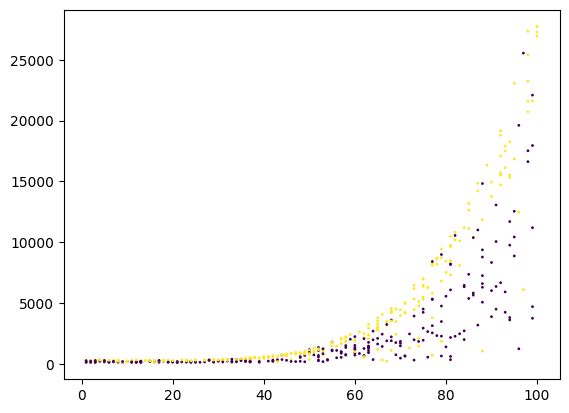

In [20]:
import matplotlib.pyplot as plt

plt.scatter(test_x.horas_esperadas, test_x.preco, c=teste_y, s=1)

Já temos o plot básico, nossa próxima tarefa é desenhar a classificação que estipulamos: se o valor for 0, pintaremos de uma cor, se for 1, de outra. Além disso, entre esses números, adicionaremos uma cor diferente para que possamos visualizar a curva que separa as duas classificações do algoritmo.

Para tanto, usaremos plt.contourf() (de countor, ou "contorno"), que receberá xx, yy e Z. Para que a tonalidade não seja muito forte, escreveremos alpha=0.3, aumentando a transparência.

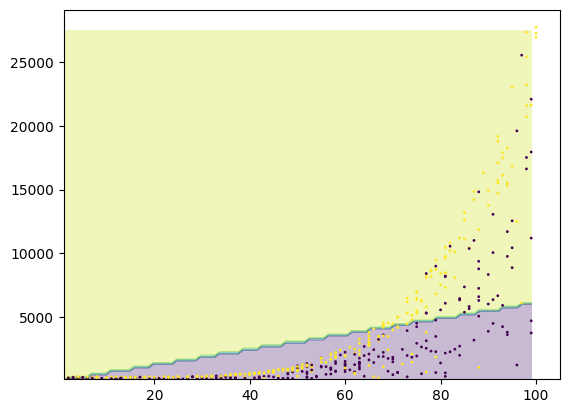

In [21]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=teste_y, s=1)

Treinaremos com 1617 elementos e testaremos com 540 elementos
Taxa de acerto: 66.85%


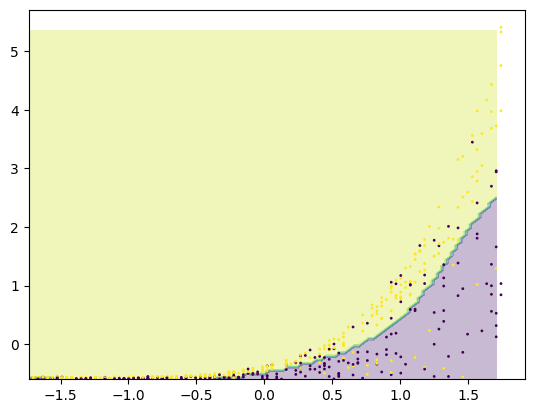

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# determinando a seed do random state para não termos resultados diferentes
SEED = 5
np.random.seed(SEED)

# definindo as variaveis de treino e teste do modelo
raw_train_x, raw_test_x, train_y, teste_y = train_test_split(x, y, 
                                                     test_size=0.25,
                                                     stratify = y
                                                    )
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(train_x), (len(test_x))))

# transformando as escalas do modelo, para que o grafico tenha a mesma referencia para as duas features
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

# criando o modelo
model = SVC(gamma='auto')
model.fit(train_x, train_y)

# realizando previsões
previsoes = model.predict(test_x)

# medindo a taxa de acerto do modelo
acuracia = accuracy_score(previsoes, teste_y)
print(f'Taxa de acerto: {acuracia:.2%}')

# trazendo as colunas do dataset pelo novo test_x definido pelo scaler
data_x = test_x[:,0]
data_y = test_x[:,1]

# formatando o scatterplot, para visualizarmos a curva de decisão do modelo
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

xx.ravel()

pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)